In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
train_dir = r'C:\Users\DELL\Documents\Machine Learning\Deep Learning-T\train'
valdiation_dir = r'C:\Users\DELL\Documents\Machine Learning\Deep Learning-T\validation'
test_dir = r'C:\Users\DELL\Documents\Machine Learning\Deep Learning-T\test'

## Data Preprocessing

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
# Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
              train_dir,
              target_size = (150,150),
              batch_size=20,
              class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
              valdiation_dir,
              target_size = (150,150),
              batch_size=20,
              class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers,models

In [7]:
model = models.Sequential()

# First Convolutional layer
model.add(layers.Conv2D(32,(3,3),activation="relu",
                      input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))

# Second Convolutional layer
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))

# Third Convolutional layer
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))

# Fourth Convolutional layer
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())

model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [9]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy",
             optimizer = optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/20


<ipython-input-10-13e2a2ab6519>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 32s 316ms/step - loss: 0.6919 - acc: 0.5420 - val_loss: 0.6842 - val_acc: 0.5010
Epoch 2/20
100/100 [==============================] - 31s 307ms/step - loss: 0.6761 - acc: 0.5780 - val_loss: 0.6610 - val_acc: 0.6180
Epoch 3/20
100/100 [==============================] - 31s 312ms/step - loss: 0.6490 - acc: 0.6260 - val_loss: 0.6414 - val_acc: 0.6350
Epoch 4/20
100/100 [==============================] - 33s 326ms/step - loss: 0.6183 - acc: 0.6705 - val_loss: 0.6206 - val_acc: 0.6490
Epoch 5/20
100/100 [==============================] - 34s 336ms/step - loss: 0.5852 - acc: 0.6835 - val_loss: 0.6979 - val_acc: 0.5710
Epoch 6/20
100/100 [==============================] - 33s 328ms/step - loss: 0.5563 - acc: 0.7235 - val_loss: 0.5989 - val_acc: 0.6690
Epoch 7/20
100/100 [==============================] - 33s 327ms/step - loss: 0.5358 - acc: 0.7180 - val_loss: 0.6001 - val_acc: 0.6780
Epoch 8/20
100/100 [==============================] - 35s 353ms/st

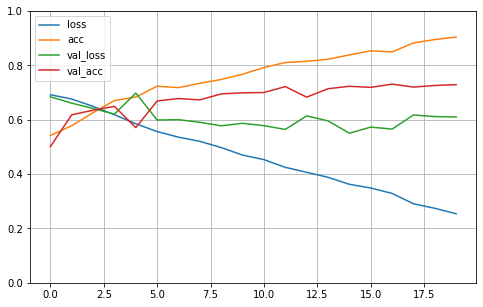

In [11]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [12]:
model.save("model1(71%).h5")

In [20]:
from tensorflow.keras import backend as K

K.clear_session()
del model

## Data Augmentation

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        valdiation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [26]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [27]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=62,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=31)

Epoch 1/100


<ipython-input-27-e9002c582c13>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


62/62 [==============================] - 31s 483ms/step - loss: 0.6984 - acc: 0.5208 - val_loss: 0.6931 - val_acc: 0.5020
Epoch 2/100
62/62 [==============================] - 29s 470ms/step - loss: 0.7004 - acc: 0.5422 - val_loss: 0.6871 - val_acc: 0.5433
Epoch 3/100
62/62 [==============================] - 29s 471ms/step - loss: 0.6799 - acc: 0.5595 - val_loss: 0.6741 - val_acc: 0.5696
Epoch 4/100
62/62 [==============================] - 29s 468ms/step - loss: 0.6615 - acc: 0.6037 - val_loss: 0.6381 - val_acc: 0.6472
Epoch 5/100
62/62 [==============================] - 29s 465ms/step - loss: 0.6545 - acc: 0.6184 - val_loss: 0.6148 - val_acc: 0.6613
Epoch 6/100
62/62 [==============================] - 30s 476ms/step - loss: 0.6365 - acc: 0.6204 - val_loss: 0.6397 - val_acc: 0.6069
Epoch 7/100
62/62 [==============================] - 31s 494ms/step - loss: 0.6301 - acc: 0.6616 - val_loss: 0.6756 - val_acc: 0.5675
Epoch 8/100
62/62 [==============================] - 35s 570ms/step - loss

Epoch 62/100
62/62 [==============================] - 34s 551ms/step - loss: 0.4239 - acc: 0.8110 - val_loss: 0.4429 - val_acc: 0.7923
Epoch 63/100
62/62 [==============================] - 34s 555ms/step - loss: 0.4255 - acc: 0.8110 - val_loss: 0.4298 - val_acc: 0.8065
Epoch 64/100
62/62 [==============================] - 35s 558ms/step - loss: 0.3994 - acc: 0.8206 - val_loss: 0.4165 - val_acc: 0.7994
Epoch 65/100
62/62 [==============================] - 38s 616ms/step - loss: 0.4144 - acc: 0.8211 - val_loss: 0.5835 - val_acc: 0.7681
Epoch 66/100
62/62 [==============================] - 41s 656ms/step - loss: 0.4280 - acc: 0.8110 - val_loss: 0.3973 - val_acc: 0.8185
Epoch 67/100
62/62 [==============================] - 37s 602ms/step - loss: 0.4161 - acc: 0.8125 - val_loss: 0.4344 - val_acc: 0.8145
Epoch 68/100
62/62 [==============================] - 38s 621ms/step - loss: 0.4221 - acc: 0.8181 - val_loss: 0.4146 - val_acc: 0.8145
Epoch 69/100
62/62 [==============================] - 4

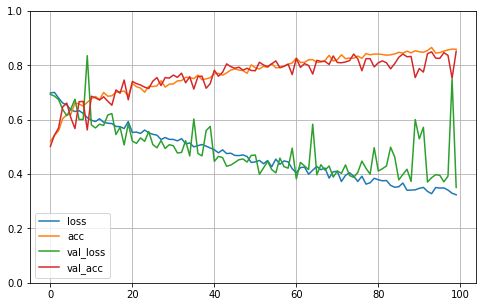

In [28]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [29]:
model.save("model1(85%).h5")

In [30]:
K.clear_session()
del model

## VGG16

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    valdiation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150,150,3))

58889256/58889256 [==============================] - 5s 0us/step


In [34]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [35]:
from  tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [37]:
# conv_base.trainable = False

In [38]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy",
             optimizer = optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

In [43]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_Project_Model-{epoch:02d}.h5",save_best_only=True)

In [44]:
history= model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50,
    callbacks = [checkpoint_cb]
)


Epoch 1/30
100/100 [==============================] - 418s 4s/step - loss: 0.6934 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 404s 4s/step - loss: 0.6932 - acc: 0.4980 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 386s 4s/step - loss: 0.6932 - acc: 0.4960 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 404s 4s/step - loss: 0.6932 - acc: 0.4880 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/30
100/100 [==============================] - 411s 4s/step - loss: 0.6932 - acc: 0.4960 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/30
100/100 [==============================] - 399s 4s/step - loss: 1.8106 - acc: 0.5105 - val_loss: 0.6922 - val_acc: 0.5790
Epoch 7/30
100/100 [==============================] - 406s 4s/step - loss: 0.6958 - acc: 0.5055 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 8/30
100/100 [==============================] - 420s 4s/step - 

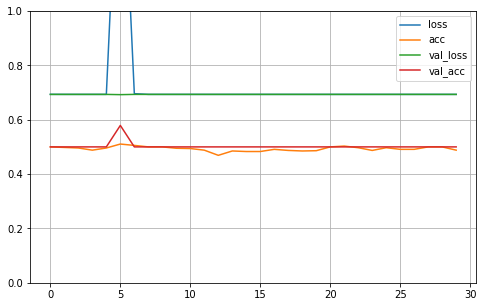

In [46]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [47]:
hist_df = pd.DataFrame(history.history)

In [48]:
hist_csv_file = 'history.csv'
with open(hist_csv_file,mode='w') as f:
    hist_df.to_csv(f)

In [49]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size =(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 1007 images belonging to 3 classes.


In [50]:
model.evaluate(test_generator,steps=50)

50/50 [==============================] - 39s 771ms/step - loss: 0.6969 - acc: 0.0060


[0.696887731552124, 0.006000000052154064]